# Support Vector Machines (SVM) Tutorial
This tutorial explores Support Vector Machines (SVM) and demonstrates the impact of kernel functions on classification performance.  
We will use the **Iris dataset** and perform the following steps:  
1. Load and visualize the data.  
2. Preprocess the data (e.g., scaling).  
3. Train SVM models with different kernels.  
4. Evaluate the models using metrics and visualizations.


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap


## Load and Explore the Dataset
We are using the Iris dataset, a popular dataset for classification tasks.  
- Features: Sepal length, Sepal width, Petal length, Petal width.  
- Target: Three classes of Iris flowers.  
We'll visualize the dataset to understand its distribution.


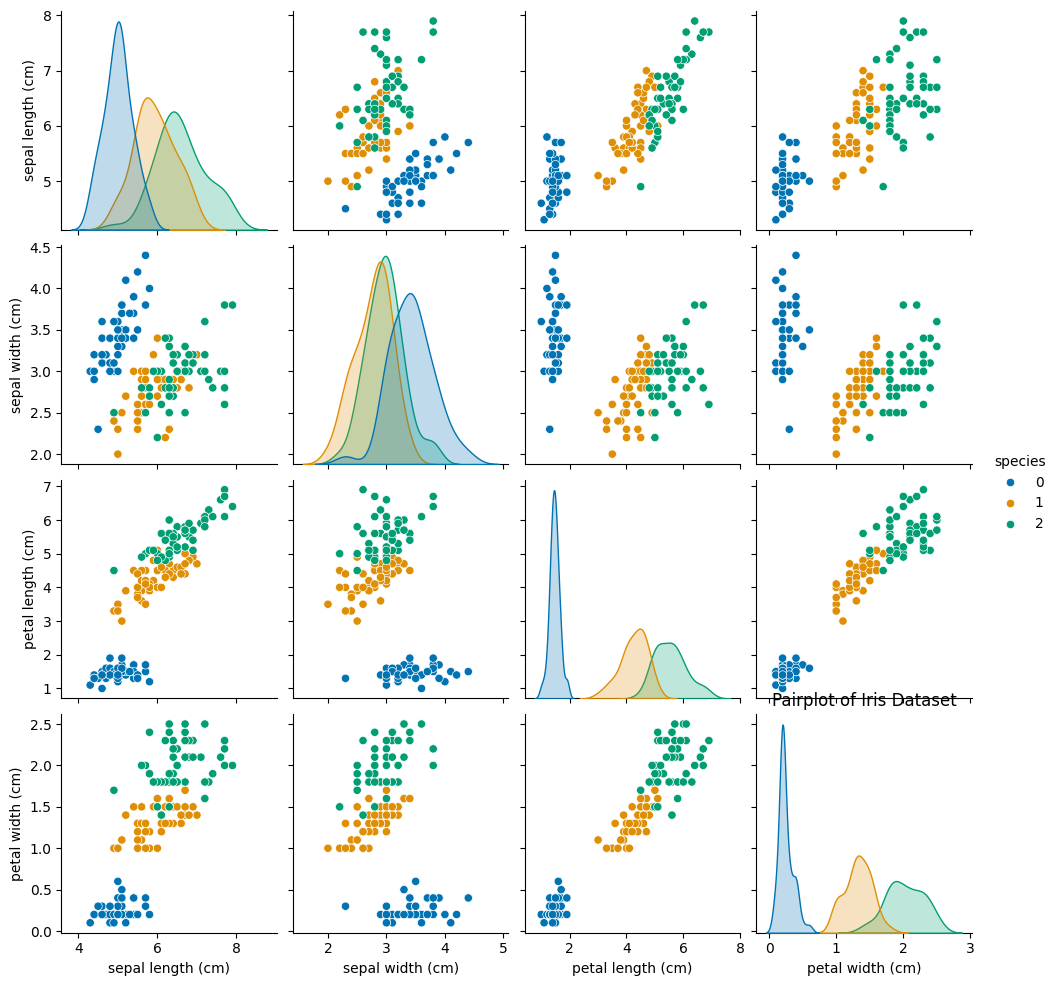

In [ ]:
# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
features = iris.feature_names
target_names = iris.target_names

# Convert to DataFrame for easier handling
iris_df = pd.DataFrame(X, columns=features)
iris_df['species'] = y

# Visualize the dataset
sns.pairplot(iris_df, hue='species', palette='colorblind')
plt.title("Pairplot of Iris Dataset")
plt.show()


## Data Preprocessing
SVMs are sensitive to feature scales, so we standardize the features using `StandardScaler`.  
This ensures all features contribute equally to the model.


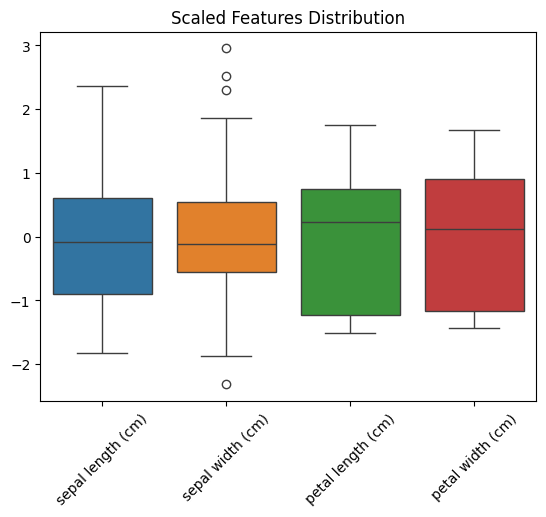

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features for SVM
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Visualize how features are scaled
scaled_df = pd.DataFrame(X_train, columns=features)
sns.boxplot(data=scaled_df)
plt.title("Scaled Features Distribution")
plt.xticks(rotation=45)
plt.show()


## Training SVM Models with Different Kernels
We will train SVMs with the following kernels:  
- **Linear kernel**: Best for linearly separable data.  
- **Polynomial kernel**: Captures more complex relationships with degrees.  
- **RBF (Radial Basis Function) kernel**: Captures non-linear patterns.  

For each kernel, we'll perform hyperparameter tuning using `GridSearchCV`.


In [ ]:
# Initialize kernels and their hyperparameters
kernels = {
    "linear": {"C": [0.1, 1, 10]},
    "poly": {"C": [0.1, 1, 10], "degree": [2, 3, 4]},
    "rbf": {"C": [0.1, 1, 10], "gamma": [0.01, 0.1, 1]}
}

results = {}

# Loop through kernels and train SVM models
for kernel, params in kernels.items():
    print(f"\nTraining with {kernel} kernel...")

    # Perform hyperparameter tuning using GridSearchCV
    model = GridSearchCV(SVC(kernel=kernel), param_grid=params, cv=3)
    model.fit(X_train, y_train)

    # Evaluate on test data
    y_pred = model.best_estimator_.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[kernel] = {
        "accuracy": acc,
        "best_params": model.best_params_
    }

    print(f"Best Parameters for {kernel} kernel: {model.best_params_}")
    print(f"Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred))



Training with linear kernel...
Best Parameters for linear kernel: {'C': 1}
Accuracy: 0.91
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.88        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45


Training with poly kernel...
Best Parameters for poly kernel: {'C': 10, 'degree': 3}
Accuracy: 0.91
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.79      1.00      0.88        15
           2       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45


Training with rbf kernel...
Best Parameters f

## Visualize Kernel Performance
The performance of different kernels is visualized in a bar plot.  
This helps us compare which kernel performed the best.


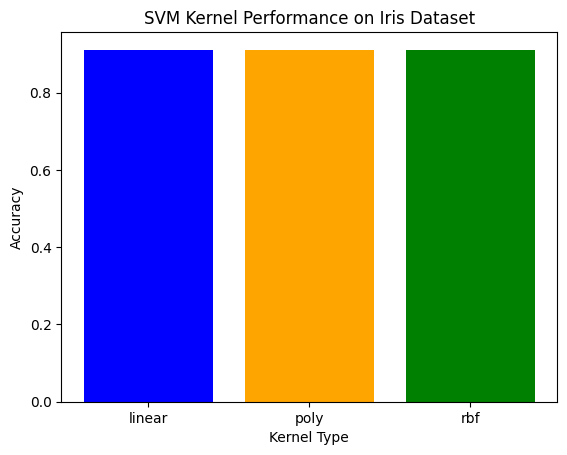

In [ ]:
# Visualize kernel performance
plt.bar(results.keys(), [v['accuracy'] for v in results.values()], color=['blue', 'orange', 'green'])
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.title('SVM Kernel Performance on Iris Dataset')
plt.show()


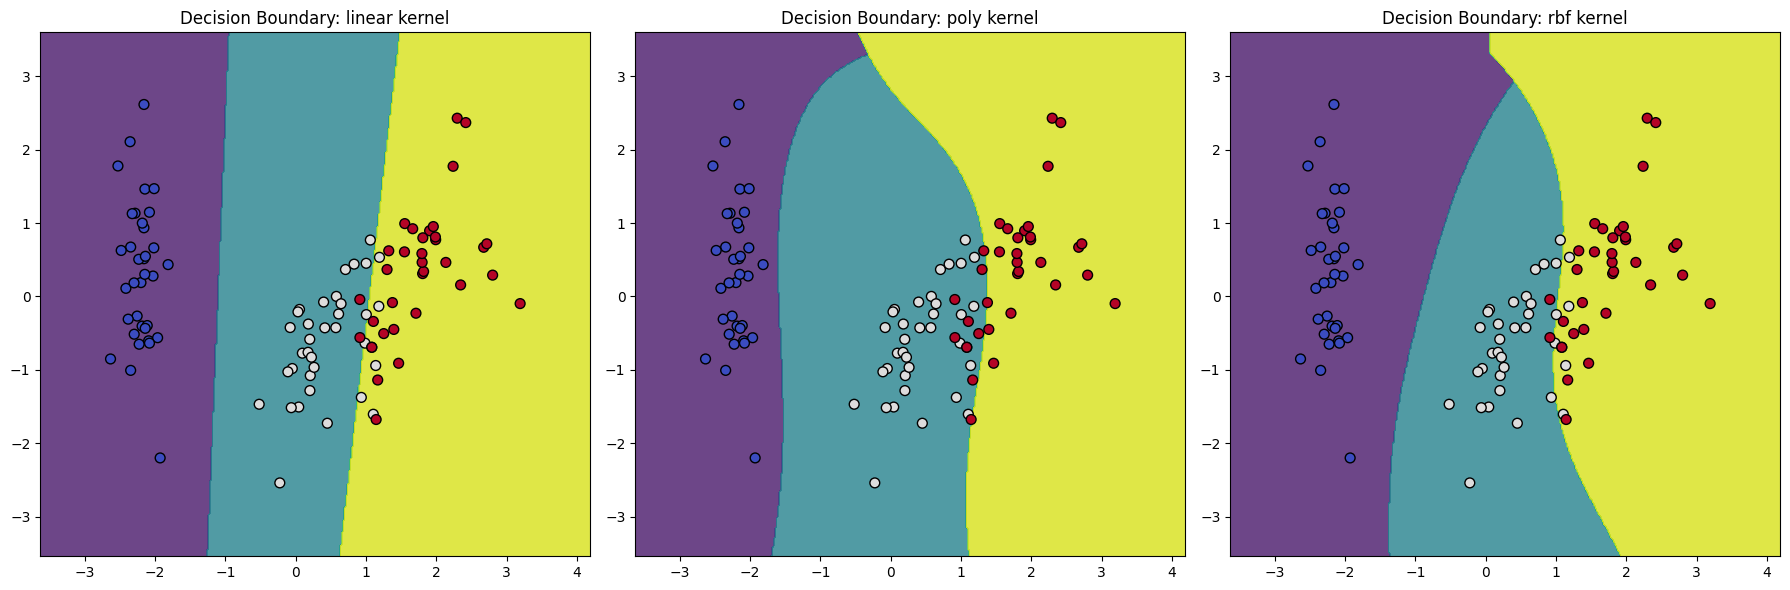

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.transform(X_test)

# Define a function to plot decision boundaries
def plot_decision_boundary(X, y, model, ax, title=""):
    # Create a mesh grid for plotting decision boundaries
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict the labels for each point in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap=plt.cm.coolwarm)
    ax.set_title(title)

# Create subplots for each kernel
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Train models and plot decision boundaries for each kernel
for i, kernel in enumerate(kernels):
    model = SVC(kernel=kernel)
    model.fit(X_train_2D, y_train)

    # Call the plotting function for each kernel
    plot_decision_boundary(X_train_2D, y_train, model, axes[i], title=f"Decision Boundary: {kernel} kernel")

plt.tight_layout()
plt.show()



# Summary
In this tutorial, we demonstrated:
1. How SVM kernels affect classification performance.  
2. How hyperparameter tuning can optimize model accuracy.  
3. How to visualize decision boundaries for SVM models.

